<a href="https://colab.research.google.com/github/MariaGodoi/cn1t2/blob/main/Quest%C3%A3o_2_Fisqui.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

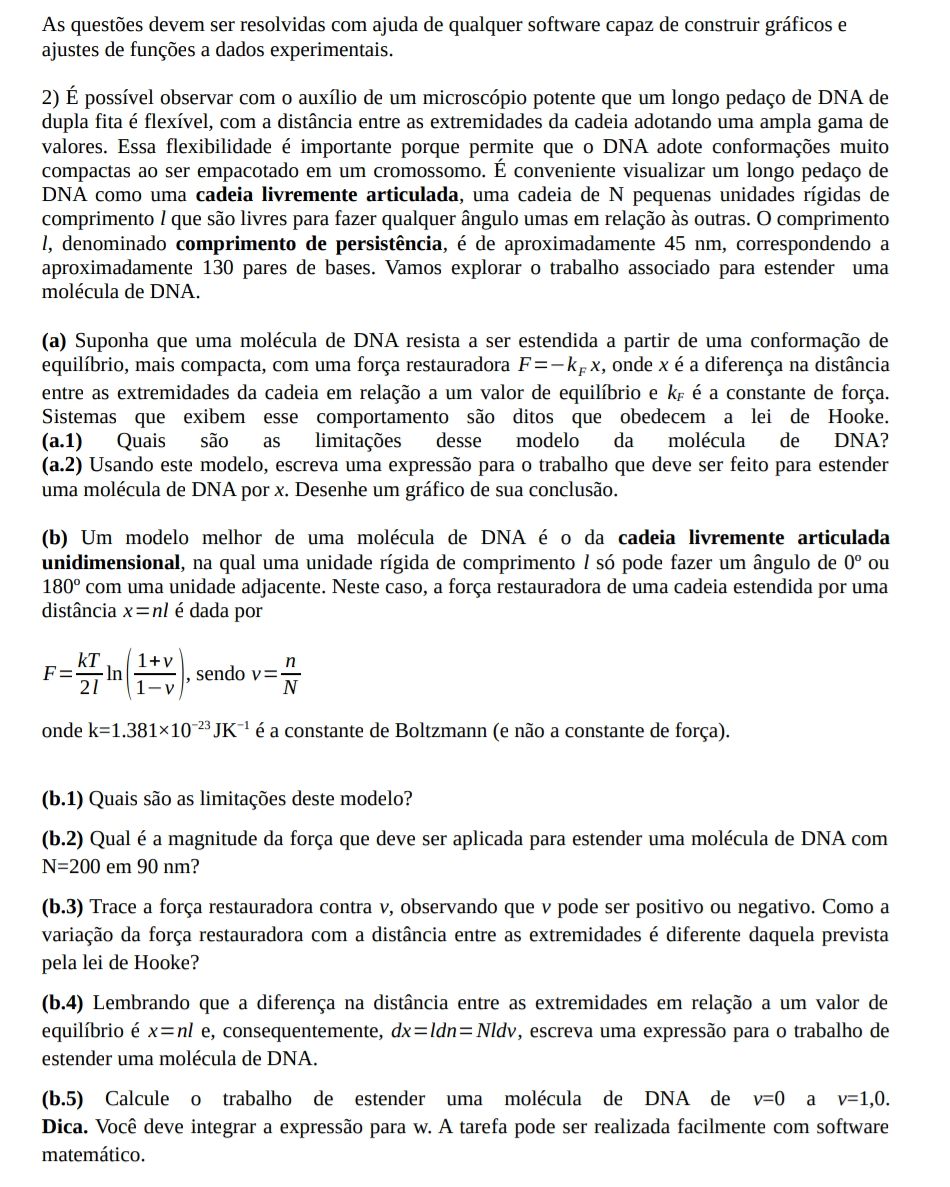

=== PARÂMETROS ===
k = 1.381e-23 J/K, l = 4.50e-08 m, N = 200, T = 300 K

=== (a.1) Limitações do modelo de Hooke ===
1. Assume F linear (válido apenas para pequenas extensões)
2. Não considera origem entrópica da elasticidade
3. Diverge do real para x → máximo
4. Ignora a natureza discreta da cadeia

=== (a.2) Trabalho no modelo de Hooke ===
F = -kF·x ⇒ w(0→x) = (1/2)·kF·x²



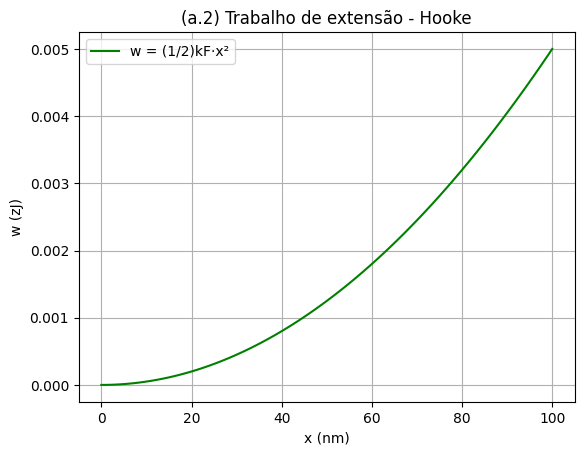

=== (b.1) Limitações do modelo 1D ===
1. Restrição unidimensional (DNA é 3D)
2. Ângulos discretos 0°/180° irreais
3. Não inclui interações eletrostáticas/volume excluído
4. Assume segmentos rígidos ideais

=== (b.2) Força para extensão de 90 nm ===
Comprimento total da cadeia = 9.000e-06 m
v = n/N = 1.000e-02
Força = 1.841e-15 N



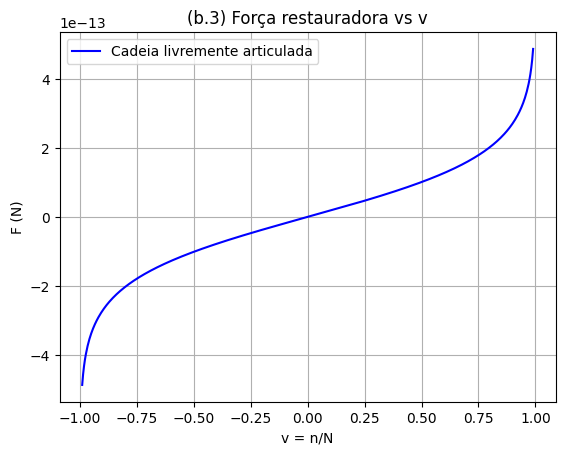

Comparação com Hooke:
- Hooke: F linear; aqui: F não-linear
- Divergência em v → ±1 (extensão máxima)
- Para pequenas extensões, aproxima-se de Hooke

=== (b.4) Trabalho ===
x = v·N·l ⇒ dx = N·l·dv
dw = F·dx = F·N·l·dv
w = N·k·T ∫ ln[(1+v)/(1-v)] dv

=== (b.5) Trabalho numérico ===
w = 1.141e-18 J
w = 2.755e+02 kT
Erro estimado = 5.1e-19 J



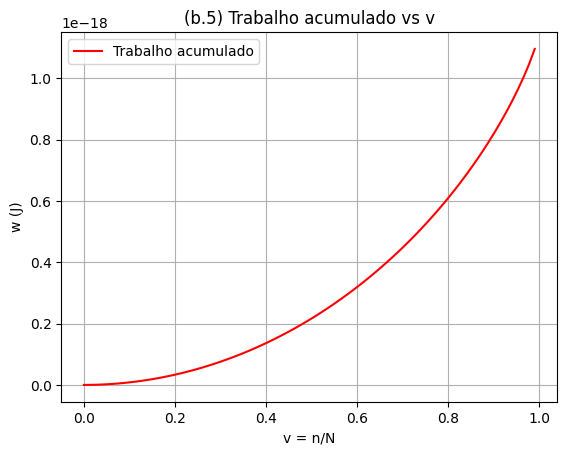

=== Análise final ===
- Hooke: válido apenas para pequenas extensões (linear)
- Cadeia livremente articulada: não-linear, mais realista
- Força e trabalho divergem para v → 1 (extensão máxima)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# =============================================================================
# CONSTANTES E PARÂMETROS
# =============================================================================
k = 1.381e-23   # Constante de Boltzmann (J/K)
l = 45e-9       # Comprimento de persistência (m)
N = 200         # Número de unidades
T = 300         # Temperatura (K)

print("=== PARÂMETROS ===")
print(f"k = {k:.3e} J/K, l = {l:.2e} m, N = {N}, T = {T} K\n")

# =============================================================================
# (a.1) LIMITAÇÕES DO MODELO DE HOOKE
# =============================================================================
print("=== (a.1) Limitações do modelo de Hooke ===")
print("1. Assume F linear (válido apenas para pequenas extensões)")
print("2. Não considera origem entrópica da elasticidade")
print("3. Diverge do real para x → máximo")
print("4. Ignora a natureza discreta da cadeia\n")

# =============================================================================
# (a.2) TRABALHO NO MODELO DE HOOKE
# =============================================================================
print("=== (a.2) Trabalho no modelo de Hooke ===")
print("F = -kF·x ⇒ w(0→x) = (1/2)·kF·x²\n")

kF = 1e-9  # Constante arbitrária (N/m)
x_values = np.linspace(0, 100e-9, 100)
w_hooke = 0.5 * kF * x_values**2

plt.figure()
plt.plot(x_values*1e9, w_hooke*1e21, 'g-', label='w = (1/2)kF·x²')
plt.xlabel('x (nm)'); plt.ylabel('w (zJ)')
plt.title('(a.2) Trabalho de extensão - Hooke')
plt.grid(); plt.legend(); plt.show()

# =============================================================================
# (b.1) LIMITAÇÕES DO MODELO DE CADEIA ARTICULADA
# =============================================================================
print("=== (b.1) Limitações do modelo 1D ===")
print("1. Restrição unidimensional (DNA é 3D)")
print("2. Ângulos discretos 0°/180° irreais")
print("3. Não inclui interações eletrostáticas/volume excluído")
print("4. Assume segmentos rígidos ideais\n")

# =============================================================================
# (b.2) FORÇA PARA EXTENSÃO DE 90 nm
# =============================================================================
x = 90e-9
n = x / l
v = n / N
F = (k * T / l) * np.log((1 + v) / (1 - v))

print("=== (b.2) Força para extensão de 90 nm ===")
print(f"Comprimento total da cadeia = {N*l:.3e} m")
print(f"v = n/N = {v:.3e}")
print(f"Força = {F:.3e} N\n")

# =============================================================================
# (b.3) GRÁFICO DA FORÇA RESTAURADORA
# =============================================================================
v_values = np.linspace(-0.99, 0.99, 500)
F_values = (k * T / l) * np.log((1 + v_values) / (1 - v_values))

plt.figure()
plt.plot(v_values, F_values, 'b-', label='Cadeia livremente articulada')
plt.xlabel('v = n/N'); plt.ylabel('F (N)')
plt.title('(b.3) Força restauradora vs v')
plt.grid(); plt.legend(); plt.show()

print("Comparação com Hooke:")
print("- Hooke: F linear; aqui: F não-linear")
print("- Divergência em v → ±1 (extensão máxima)")
print("- Para pequenas extensões, aproxima-se de Hooke\n")

# =============================================================================
# (b.4) EXPRESSÃO DO TRABALHO
# =============================================================================
print("=== (b.4) Trabalho ===")
print("x = v·N·l ⇒ dx = N·l·dv")
print("dw = F·dx = F·N·l·dv")
print("w = N·k·T ∫ ln[(1+v)/(1-v)] dv\n")

# =============================================================================
# (b.5) CÁLCULO DO TRABALHO
# =============================================================================
def forca_v(v): return (k * T / l) * np.log((1 + v) / (1 - v))
def integrando(v): return forca_v(v) * N * l

resultado, erro = integrate.quad(integrando, 0, 0.999)

print("=== (b.5) Trabalho numérico ===")
print(f"w = {resultado:.3e} J")
print(f"w = {resultado/(k*T):.3e} kT")
print(f"Erro estimado = {erro:.1e} J\n")

# Gráfico do trabalho acumulado
v_range = np.linspace(0, 0.99, 80)
w_acc = [integrate.quad(integrando, 0, v)[0] for v in v_range]

plt.figure()
plt.plot(v_range, np.array(w_acc), 'r-', label='Trabalho acumulado')
plt.xlabel('v = n/N'); plt.ylabel('w (J)')
plt.title('(b.5) Trabalho acumulado vs v')
plt.grid(); plt.legend(); plt.show()

print("=== Análise final ===")
print("- Hooke: válido apenas para pequenas extensões (linear)")
print("- Cadeia livremente articulada: não-linear, mais realista")
print("- Força e trabalho divergem para v → 1 (extensão máxima)\n")